In [140]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [141]:
import torch

In [142]:
%store -r train_subset

In [143]:
train_subset

,processed_text,general label
0,we should ban human cloning as it will only ca...,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
1,fast food should be banned because it is reall...,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
2,sometimes economic sanctions are the only thin...,"[0.0, 0.0, 0.0, 0.5, 0.5, 0.0]"
3,capital punishment is sometimes the only optio...,"[0.0, 0.0, 0.0, 0.0, 0.6666666666666666, 0.333..."
4,factory farming allows for the production of c...,"[0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.666..."
...,...,...
5387,on the one hand we have russia killing countle...,"[0.0, 0.0, 0.0, 0.5, 0.25, 0.25]"
5388,the subsidies were originally intended to ensu...,"[0.0, 0.0, 0.0, 0.0, 0.4, 0.6]"
5389,these products come mainly from large enterpri...,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]"
5390,subsidies often make farmers in recipient coun...,"[0.0, 0.0, 0.0, 0.0, 0.5, 0.5]"


The vectorization of the 2000 most common nouns was achieved in the preprocessing phase and now it will be used as CNN input

In [144]:
%store -r df

In [145]:
df

processed_text,we should ban human cloning as it will only cause huge issues when you have a bunch of the same humans running around all acting the same,fast food should be banned because it is really bad for your health and is costly,sometimes economic sanctions are the only thing that will get the corrupt governments to take action,capital punishment is sometimes the only option to keep criminals from committing more crimes,factory farming allows for the production of cheap food which is a necessity for families surviving on a low income,nuclear weapons help keep the peace in uncertain times,it should be allowed if the student wants to pray as long as it is not interfering with his classes,three strike laws can cause young people to be put away for life without a chance to straight out their life,adopting austerity regime will have very negative impact on the poor and the vulnerable in society,we should adopt an austerity regime because it is unfair to expect future generations to settle the debts that we run up,...,i am in favor of a possible army but i would like to see it combined with social services and reconstruction so ngos and development cooperation must be involved an army that can fight must also be able to build we therefore also need a civilian army in europe i would also like an army consisting of civilians in uniform in the same way as the german army please also take into account the right to refuse orders due to conscientious objection also as in the german army,absolutely right europe needs an army for continental defense conscription must be introduced at the european level the army must have the most modern weapons to deter russia turkey and china,in principle i would be in favor of a european army but i would tie it to a reform of european decision making majority or 2/3 majority an army is worth nothing if the members can not agree or if a single country uses it as a means of pressure to push through its own interests,i agree with your idea but it is a long and arduous way to reach the goal what 's the point of building a skyscraper without a foundation what i mean by that first the eu needs a unified foreign policy and only then a common and united army,a european army is not a controversial idea but a question of what integration of the armed forces of the member states means and what an army is in general eu action on security and defense must extend to vigilance openness and transparency in economic financial fiscal and social infrastructures a european or joint ideally worldwide army is not a hierarchy but an idea of common values in the sense of human rights and strategic and coordinated action as well as socio economic prosperity for all without environmental pollution but ordinances decrees etc are a kind of silent mail and can falsify the legal goals and values as can reports and statistics,on the one hand we have russia killing countless ukrainians and committing sabotage in britain and the czech republic and on the other hand we have reluctant united states that is switching between isolationist and interventionist policies every 4 8 years i stand convinced that in order for the european union to move forward it must begin to introduce measures for the security of both the current member states as well as the future member states that are endangered due to foreign aggression and bring the responsibility of continental safety firmly in our own hands if europe is to find the peace it must have the means to create peace by being able to protect itself against hostile foreign influences,the subsidies were originally intended to ensure the security of supply for the european population but when you export subsidized food it 's at the expense of european taxpayers export yes but then no more subsidies for these products,these products come mainly from large enterprises which do not necessarily focus on environmental protection,subsidies often make farmers in recipient countries uncompetitive hamper

In [146]:
X_train=df.T
y_train=train_subset["general label"]

Strumentopolo 0: first attempt on 6 classes

In [147]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.datasets import imdb
from keras.utils import pad_sequences

# set parameters:
max_features = 5000
maxlen = 1435
batch_size = 256
embedding_dims = 80 # Length of the token vectors
filters = 6 # dimensionality of the output space
kernel_size = 3 # height and width of the convolution window
hidden_dims = 10

In [148]:
df = pd.DataFrame(X_train)

# Convert the entire DataFrame to a list of sequences
X_train = df.values.tolist()

In [149]:
#df = pd.DataFrame(y_train)

# Convert the entire DataFrame to a list of sequences
#y_train = df.values.tolist()

In [150]:
print('Pad sequences (samples x time)')
X_train = pad_sequences(X_train, maxlen=maxlen)
#X_valid = pad_sequences(X_valid, maxlen=maxlen)
#y_train = pad_sequences(y_train, maxlen=maxlen)
#y_valid = pad_sequences(y_valid, maxlen=maxlen)
print('X_train shape:', X_train.shape)
#print('X_valid shape:', X_valid.shape)
#print('y_train shape:', y_train.shape)
#print('y_valid shape:', y_valid.shape)

Pad sequences (samples x time)


X_train shape: (5392, 1435)


In [151]:
model = Sequential()

# We start off with an efficient embedding layer which maps our vocab indices
# into embedding_dims dimensions
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))

model.add(Dropout(0.2))

# We add a Convolution1D, which will learn
# word group filters of size filter_length:

# This layer creates a convolution kernel that is convolved with the layer input
# over a single spatial (or temporal) dimension to produce a tensor of outputs
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))

# We use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We add the second vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(6))
model.add(Activation('softmax'))


In [152]:
from keras.optimizers import Adam

learning_rate = 0.01  # Set your desired learning rate

optimizer = Adam(learning_rate=learning_rate)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [153]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 1435, 80)          400000    
                                                                 
 dropout_32 (Dropout)        (None, 1435, 80)          0         
                                                                 
 conv1d_25 (Conv1D)          (None, 1433, 6)           1446      
                                                                 
 global_max_pooling1d_15 (Gl  (None, 6)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_41 (Dense)            (None, 10)                70        
                                                                 
 dropout_33 (Dropout)        (None, 10)                0         
                                                     

                                                                 
 activation_19 (Activation)  (None, 10)                0         
                                                                 
 dense_43 (Dense)            (None, 6)                 66        
                                                                 
 activation_20 (Activation)  (None, 6)                 0         
                                                                 
Total params: 401,692
Trainable params: 401,692
Non-trainable params: 0
_________________________________________________________________


In [154]:
X_train.shape

(5392, 1435)

In [155]:
y_train

0                          [0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
1                          [0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
2                          [0.0, 0.0, 0.0, 0.5, 0.5, 0.0]
3       [0.0, 0.0, 0.0, 0.0, 0.6666666666666666, 0.333...
4       [0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.666...
                              ...                        
5387                     [0.0, 0.0, 0.0, 0.5, 0.25, 0.25]
5388                       [0.0, 0.0, 0.0, 0.0, 0.4, 0.6]
5389                       [0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
5390                       [0.0, 0.0, 0.0, 0.0, 0.5, 0.5]
5391                   [0.0, 0.0, 0.25, 0.25, 0.25, 0.25]
Name: general label, Length: 5392, dtype: object

In [156]:
y_train = y_train.to_numpy()
y_train = np.array(y_train.tolist())

In [157]:
y_train

array([[0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 0.5 , 0.5 , 0.  ],
       ...,
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 0.  , 0.5 , 0.5 ],
       [0.  , 0.  , 0.25, 0.25, 0.25, 0.25]])

In [158]:
X_train

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [159]:
%store -r training_data

In [160]:
training_data

,Argument_ID,Conclusion,Stance,Premise,Face,Humility,processed_text,label,tuples,Openness to change,Self-Enhancement,Conservation,Self-Transcendence,general label
0,A01002,We should ban human cloning,in favor of,we should ban human cloning as it will only ca...,0,0,we should ban human cloning as it will only ca...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",(we should ban human cloning as it will only c...,0,0,1,0,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
1,A01005,We should ban fast food,in favor of,fast food should be banned because it is reall...,0,0,fast food should be banned because it is reall...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",(fast food should be banned because it is real...,0,0,1,0,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]"
2,A01006,We should end the use of economic sanctions,against,sometimes economic sanctions are the only thin...,0,0,sometimes economic sanctions are the only thin...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, ...",(sometimes economic sanctions are the only thi...,0,1,1,0,"[0.0, 0.0, 0.0, 0.5, 0.5, 0.0]"
3,A01007,We should abolish capital punishment,against,capital punishment is sometimes the only optio...,0,0,capital punishment is sometimes the only optio...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",(capital punishment is sometimes the only opti...,0,0,2,1,"[0.0, 0.0, 0.0, 0.0, 0.6666666666666666, 0.333..."
4,A01008,We should ban factory farming,against,factory farming allows for the production of c...,0,0,factory farming allows for the production of c...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.333...",(factory farming allows for the production of ...,0,0,1,2,"[0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.666..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5387,E08016,The EU should integrate the armed forces of it...,in favor of,"On the one hand, we have Russia killing countl...",0,0,on the one hand we have russia killing countle...,"[0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.0, 0.0, 0.0...",(on the one hand we have russia killing countl...,0,2,1,1,"[0.0, 0.0, 0.0, 0.5, 0.25, 0.25]"
5388,E08017,Food whose production has been subsidized with...,in favor of,The subsidies were originally intended to ensu...,0,0,the subsidies were originally intended to ensu...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, ...",(the subsidies were originally intended to ens...,0,0,2,3,"[0.0, 0.0, 0.0, 0.0, 0.4, 0.6]"
5389,E08018,Food whose production has been subsidized with...,in favor of,These products come mainly from large enterpri...,0,0,these products come mainly from large enterpri...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",(these products come mainly from large enterpr...,0,0,0,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]"
5390,E08019,Food whose production has been subsidized with...,in favor of,Subsidies often make farmers in recipient coun...,0,0,subsidies often make farmers in recipient coun...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.166...",(subsidies often make farmers in recipient cou...,0,0,3,3,"[0.0, 0.0, 0.0, 0.0, 0.5, 0.5]"


Differentiate between the original 20 labels and the new 6 generalized labels so that the model can be implemented to both of them

In [161]:
y_train_20=training_data.label
y_train_6=training_data["general label"]

In [162]:
y_train_20 = y_train_20.to_numpy()
y_train_20 = np.array(y_train_20.tolist())

In [163]:
y_train_6 = y_train_6.to_numpy()
y_train_6 = np.array(y_train_6.tolist())

strumentopolo 1

In [164]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

# Define the model
model = Sequential()

# Embedding layer (not used in this example as we're working with binary vectors)
# model.add(Embedding(input_dim=max_features, output_dim=embedding_dims, input_length=maxlen))

# Convolutional layers
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(1435, 1)))
model.add(GlobalMaxPooling1D())

# Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer with 6 units for classification
model.add(Dense(6, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_26 (Conv1D)          (None, 1435, 64)          256       
                                                                 
 global_max_pooling1d_16 (Gl  (None, 64)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_44 (Dense)            (None, 128)               8320      
                                                                 
 dropout_35 (Dropout)        (None, 128)               0         
                                                                 
 dense_45 (Dense)            (None, 6)                 774       
                                                                 
Total params: 9,350
Trainable params: 9,350
Non-trainable params: 0
___________________________________________________

attempt with 6 labels

In [165]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_6, test_size=0.2, random_state=42)

In [166]:
# Train the model and store the history for plotting
history = model.fit(X_train, y_train,
                    epochs=20,
                    validation_data=(X_val, y_val),
                    batch_size=32,
                    verbose=1)

Epoch 1/20


135/135 [==============================] - 5s 31ms/step - loss: 1.5177 - accuracy: 0.2708 - val_loss: 1.4390 - val_accuracy: 0.2660
Epoch 2/20
135/135 [==============================] - 4s 29ms/step - loss: 1.4743 - accuracy: 0.2734 - val_loss: 1.4315 - val_accuracy: 0.2743
Epoch 3/20
135/135 [==============================] - 4s 29ms/step - loss: 1.4670 - accuracy: 0.2824 - val_loss: 1.4283 - val_accuracy: 0.2623
Epoch 4/20
135/135 [==============================] - 4s 30ms/step - loss: 1.4643 - accuracy: 0.2690 - val_loss: 1.4311 - val_accuracy: 0.2632
Epoch 5/20
135/135 [==============================] - 4s 29ms/step - loss: 1.4577 - accuracy: 0.2738 - val_loss: 1.4287 - val_accuracy: 0.2623
Epoch 6/20
135/135 [==============================] - 4s 29ms/step - loss: 1.4595 - accuracy: 0.2717 - val_loss: 1.4266 - val_accuracy: 0.2660
Epoch 7/20
135/135 [==============================] - 4s 29ms/step - loss: 1.4594 - accuracy: 0.2634 - val_loss: 1.4298 - val_accuracy: 0.2614
Epoch 8/20

strumentopolo 2.0 a bit more complex

In [167]:
"""from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

# Define the model
model = Sequential()

# Embedding layer (not used in this example as we're working with binary vectors)
# model.add(Embedding(input_dim=max_features, output_dim=embedding_dims, input_length=maxlen))

# Convolutional layers
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(1435, 1)))
model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(GlobalMaxPooling1D())

# Dense layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Output layer with 6 units for classification
model.add(Dense(6, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model.summary()"""


"from keras.models import Sequential\nfrom keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout\n\n# Define the model\nmodel = Sequential()\n\n# Embedding layer (not used in this example as we're working with binary vectors)\n# model.add(Embedding(input_dim=max_features, output_dim=embedding_dims, input_length=maxlen))\n\n# Convolutional layers\nmodel.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(1435, 1)))\nmodel.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))\nmodel.add(Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))\nmodel.add(GlobalMaxPooling1D())\n\n# Dense layers\nmodel.add(Dense(512, activation='relu'))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(256, activation='relu'))\nmodel.add(Dropout(0.5))\n\n# Output layer with 6 units for classification\nmodel.add(Dense(6, activation='softmax'))\n\n# Compile the model\nmodel.compile(loss='categorical_crossentropy', optimizer='adam

In [168]:
import matplotlib.pyplot as plt

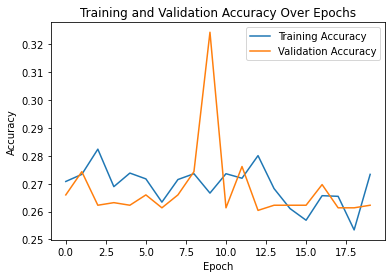

In [169]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()

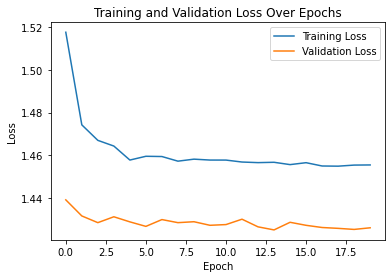

In [170]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

As for the 6 generalized labels, none of the two metrics seems to be reliable, this is probably due to the fact that the dataset needs to be balanced: some classes are much more represented than others. 
Classification attempts using the original 20 labels were even worse, with a validation accuracy score around 0.05, which would be the score of the trivial classifier.

So to-do:
- balance generalized labels
- implement again the cnn on the balanced datatset
- compare the cnn results with other classifiers such as rnn and lstm